In [1]:
from torch_pgd import pgd_attack
from utils import get_pretrained_model

import torch as ch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

import os, random

In [2]:
def tensor2pic(ImA, pop_img=False, save=False, name="pil_image.png", verbose=False):
    ImA = ImA[0].numpy()
    ImA = ImA.transpose(1, 2, 0)
    img = Image.fromarray(np.uint8(ImA * 255), 'RGB')
    if save:
        if verbose:
            print("Storing image:", name)
        img.save(name)
    if pop_img:
        img.show()
    else:
        return img

In [3]:
imA = Image.open("doge.jpg")
imA = imA.convert("RGB")
img_tA = transforms.ToTensor()(imA).view(1, 3, 224, 224)

In [4]:
# Storage details
save_images = True
title = "STEP2_"
save_path = 'Results/basic/'
images = []

In [5]:
# Parameters
eps = 100
steps = 10
step_size = 0.1
targeted_attack = True
norm = 'l2'
verbose = False

In [6]:
# Models and datasets
dataset_path = 'datasets/'
model_name = 'RestrictedImageNet'

In [7]:
def max_all_classes(model_name, image_tensor, title, save=True):
    # Iterates over all classes in the restricted imagenet 
    # and maximizes their class score for an image
    
    images = [image_tensor.detach()]
    
    tensor2pic(image_tensor.detach(), save=True, name=save_path+title+"orig.png", verbose=verbose)
    
        
    _, model = get_pretrained_model(model_name)
    model.eval()
    
    for i in range(9):
        out_img = pgd_attack(image_tensor, eps=eps, model=model, steps=steps, step_size=step_size, 
                            targeted_attack=targeted_attack, target_class=i, 
                            norm=norm, verbose=verbose)
        
        images.append(out_img)
    
        tensor2pic(out_img, save=True, name=save_path+title+"to"+str(i)+".png", verbose=verbose)
    
    return images

In [8]:
l = max_all_classes(model_name, img_tA, title+"uno_")

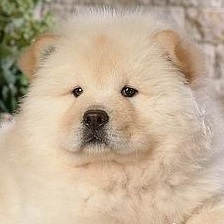

In [9]:
tensor2pic(l[0])

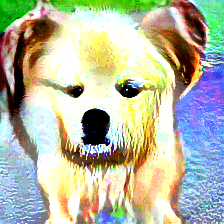

In [10]:
tensor2pic(l[1])

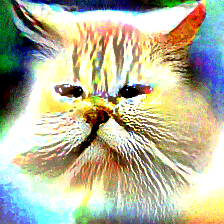

In [11]:
tensor2pic(l[2])

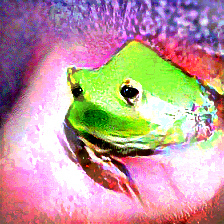

In [12]:
tensor2pic(l[3])

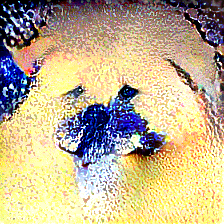

In [13]:
tensor2pic(l[4])

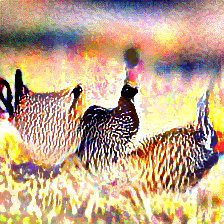

In [14]:
tensor2pic(l[5])

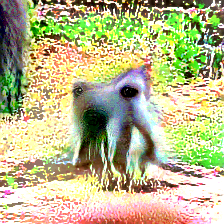

In [15]:
tensor2pic(l[6])

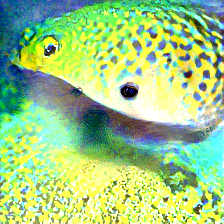

In [16]:
tensor2pic(l[7])

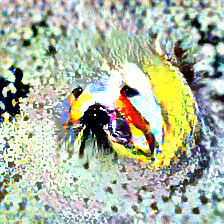

In [17]:
tensor2pic(l[8])

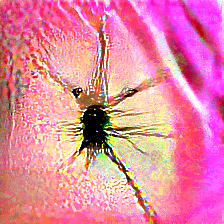

In [18]:
tensor2pic(l[9])